Gender Biases in Student Evaluations of Teachers
====================================================


In [1]:
# boilerplate
%matplotlib inline
import math
import numpy as np
import pandas as pd
from numpy.random import random
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt
from __future__ import division

# initialize PRNG
rs = np.random.RandomState(seed=1)

Permutation test code
============
You must install the _permute_ package to use this code. Install instructions can be found at https://github.com/statlab/permute.

In [2]:
from permute.core import corr  
from permute import stratified

## Read data and define new fields

In [3]:
dat = pd.read_stata("../../SET data/permutation_full.dta",  convert_categoricals=False )
#dat = dat[dat.admission_cep == 0]
dat.describe()

,student_id,year,dual_degree,entreescpoen,stu_male,stu_female,admission_exam,admission_cep,admission_bactb,admission_other,...,scpo,both_female,both_male,stumale_proffemale,stufemale_profmale,diff_final_cont,fall,spring,three_evals,sum_q10
count,22665.000000,22665.000000,22665.000000,22665.00000,22665.000000,22665.000000,22647.000000,22647.000000,22647.00000,22647.000000,...,22665.000000,22665.000000,22665.000000,22665.000000,22665.000000,22502.000000,22665.000000,22665.000000,22665.000000,22665.000000
mean,2381.468652,2010.239268,0.100993,2010.18844,0.433179,0.566821,0.674306,0.133704,0.11220,0.031527,...,0.109243,0.177101,0.295345,0.137834,0.389720,1.601022,0.589852,0.410148,0.864858,6.462696
std,1232.740116,1.345684,0.301326,1.36306,0.495526,0.495526,0.468644,0.340342,0.31562,0.174742,...,0.311951,0.381763,0.456208,0.344733,0.487697,2.793144,0.491871,0.491871,0.341883,1.693313
min,1.000000,2008.000000,0.000000,2004.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.500000,0.000000,0.000000,0.000000,1.000000
25%,1391.000000,2009.000000,0.000000,2009.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,1.000000,6.000000
50%,2453.000000,2010.000000,0.000000,2010.00000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000,1.000000,7.000000
75%,3420.000000,2011.000000,0.000000,2011.00000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,3.500000,1.000000,1.000000,1.000000,8.000000
max,4423.000000,2012.000000,1.000000,2012.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,9.000000


In [4]:
evals = ['q16', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q13', 'q14', 'q15']
if isinstance(dat.q16[0], str):
    for e in evals:
        dat[e].replace(['nonpertinent', 'insuffisant', 'moyen', 'bon', 'excellent'],\
                       [0,1,2,3,4],\
                       inplace=True)
    
dat['course'] = dat['prof_id']
dat['course'][dat['history']==1] = 'history' 
dat['course'][dat['micro']==1] = 'micro' 
dat['course'][dat['ip']==1] = 'ip' 
dat['course'][dat['macro']==1] = 'macro' 
dat['course'][dat['socio']==1] = 'socio' 
dat['course'][dat['scpo']==1] = 'scpo' 

dat['gender'] = dat.prof_male
dat['gender'][dat.gender==1] = 'M'
dat['gender'][dat.gender==0] = 'F'
dat['student_gender'] = dat.stu_male
dat['student_gender'][dat.student_gender==1] = 'M'
dat['student_gender'][dat.student_gender==0] = 'F'

# Defining the fun times for class
dat['plumTime'] = (dat['extremetime'] < 2) & dat['day'].isin([2,3,4])

C:\Users\albor_000\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\albor_000\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\albor_000\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\albor_000\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: SettingWithCopyWarning: 
A value is tryin

## Data filtering

Most of the analyses omit grades in PI, for two reasons: 
1. The final exam is oral
2. There is a large imbalance in the gender of the instructors: 52 male, 12 female
3. Since the course is "easy," that would bias results in favor of making male instructors look more effective

In [5]:
# remove the Political Institutions courses
datNoIp = dat.copy()
datNoIp = datNoIp[datNoIp['course'] != 'ip']

# Start of the analysis

### Ratings v student performance

In [6]:
# Correlation btw avg evaluation score and final exam grade, by course number. Omit IP courses

print 'Analyzing the correlation btw avg evaluation score and final exam grade, by course number' 

theCols = evals + ['prof_male','plumTime','note_cm']

grouped = datNoIp.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['note_cm'], seed = rs)
print 'overall', t, pupper, pboth,\
       prof_ratings['note_cm'].size, '\n'

for topic in np.unique(datNoIp.course):
    perTopic = datNoIp[datNoIp['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['note_cm'], seed = rs)
    print topic, t, pupper, pboth, prof_ratings['note_cm'].size

Analyzing the correlation btw avg evaluation score and final exam grade, by course number
overall -0.0187120576315 0.7183 0.564 950 

history 0.0348491783782 0.2919 0.5941 224
macro 0.116619238606 0.0405 0.0797 229
micro 0.117591704876 0.0408 0.0823 226
scpo 0.00229264434087 0.4861 0.98 135
socio 0.0613407926159 0.2451 0.4844 136


### Instructor gender v student performance

In [7]:
# Correlation of final exam and gender, by course.  Excludes IP courses.

print 'Correlation btw final exam average and instructor gender, by course' 

theCols = evals + ['prof_male','note_cm']

grouped = datNoIp.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)

(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['note_cm'], y = prof_ratings['prof_male'], seed = rs)
print 'overall', t, pupper, pboth, prof_ratings['prof_male'].sum(), \
      (1-prof_ratings['prof_male']).sum(),\
       prof_ratings['prof_male'].size, '\n'

for topic in np.unique(dat.course):
    perTopic = dat[dat['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['note_cm'], y = prof_ratings['prof_male'], seed = rs)
    print topic, t, pupper, pboth, prof_ratings['prof_male'].sum(), \
    (1-prof_ratings['prof_male']).sum(),  prof_ratings['prof_male'].size 

Correlation btw final exam average and instructor gender, by course
overall -0.0210311782873 0.7393 0.5221 625.0 325.0 950 

history -0.0661035404995 0.8365 0.3252 154.0 70.0 224
ip -0.102342637458 0.9391 0.1212 182.0 45.0 227
macro 0.00142640235884 0.49 0.9815 155.0 74.0 229
micro -0.0332177187297 0.6936 0.6177 148.0 78.0 226
scpo 0.00418393377878 0.4843 0.963 91.0 44.0 135
socio 0.011222243947 0.4462 0.8986 77.0 59.0 136


### Ratings v grade expectations

In [8]:
# Correlation btw avg evaluation score and avg cont assessment grades, by course number. Includes IP
print 'Analyzing the correlation btw avg evaluation score and cont assessment, by course number' 

theCols = evals + ['prof_male','plumTime','note_conf']

grouped = dat.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['note_conf'], seed = rs)
print 'overall', t, pupper,\
       prof_ratings['note_conf'].size, '\n'

for topic in np.unique(dat.course):
    perTopic = dat[dat['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['note_conf'], seed = rs)
    print topic, t, pupper, prof_ratings['note_conf'].size
    
    

Analyzing the correlation btw avg evaluation score and cont assessment, by course number
overall 0.100974571314 0.0003 1177 

history 0.322874961577 0.0 224
ip 0.056013141146 0.2014 227
macro 0.229445210663 0.0002 229
micro 0.186667201697 0.0028 226
scpo 0.169692942424 0.022 135
socio 0.269476214441 0.0009 136


### Ratings v instructor gender

In [9]:
# Correlation of avg evaluation score and gender, by course.  Includes IP courses.

print 'Analyzing the correlation btw avg evaluation score and gender, by course' 

theCols = evals + ['prof_male','plumTime']

grouped = dat.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)

(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['prof_male'], seed = rs)
print 'overall', t, pupper, pboth, prof_ratings['prof_male'].sum(), \
      (1-prof_ratings['prof_male']).sum(),\
       prof_ratings['prof_male'].size, '\n'

for topic in np.unique(dat.course):
    perTopic = dat[dat['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['prof_male'], seed = rs)
    print topic, t, pupper, pboth, prof_ratings['prof_male'].sum(), \
    (1-prof_ratings['prof_male']).sum(),  prof_ratings['prof_male'].size   

Analyzing the correlation btw avg evaluation score and gender, by course
overall 0.105631441051 0.0004 0.0005 807.0 370.0 1177 

history 0.122121176228 0.0329 0.0665 154.0 70.0 224
ip 0.105141548142 0.0606 0.1149 182.0 45.0 227
macro 0.107538057991 0.0571 0.1059 155.0 74.0 229
micro 0.0501378744901 0.2271 0.4483 148.0 78.0 226
scpo 0.08308070678 0.1672 0.3329 91.0 44.0 135
socio 0.0907514275643 0.1449 0.2926 77.0 59.0 136


### Ratings and gender concordance

In [10]:
# Gender concordance v overall satisfaction, grouped by course
# This looks at how students rate their profs, by course

dMale_stu = dat[dat['stu_male']==1]
dFemale_stu = dat[dat['stu_female']==1]

theCols = evals + ['prof_male','prof_female','plumTime','note_cm']

groupedMale = dMale_stu.groupby(['course_number'])
groupedFemale = dFemale_stu.groupby(['course_number'])
prof_ratings_M = groupedMale[theCols].agg(np.mean)
prof_ratings_F = groupedFemale[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings_M['q16'], y = prof_ratings_M['prof_male'], seed = rs)
print 'Male students\n'
print 'overall', t, pupper, pboth,\
       prof_ratings_M['prof_male'].size, '\n'

for topic in np.unique(dMale_stu['course']):
    perTopic = dMale_stu[dMale_stu['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['prof_male'], seed = rs)
    print topic, t, pupper, pboth, prof_ratings['prof_male'].size

print 'Female students\n'
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings_F['note_cm'], y = prof_ratings_F['prof_female'],\
                                      seed = rs)
print 'overall', t, pupper,pboth,\
       prof_ratings_F['prof_female'].size, '\n'

for topic in np.unique(dFemale_stu['course']):
    perTopic = dFemale_stu[dFemale_stu['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['prof_female'], seed = rs)
    print topic, t, pupper, pboth, prof_ratings['prof_female'].size

Male students

overall 0.153851774459 0.0 0.0 1177 

history 0.186436808803 0.0038 0.0055 224
ip 0.114401947363 0.0473 0.0857 227
macro 0.136157546015 0.0183 0.0372 229
micro 0.120907950257 0.0346 0.0683 226
scpo 0.180976901361 0.0216 0.0391 135
socio 0.121133038436 0.0817 0.161 136
Female students

overall 0.0186821094628 0.2706 0.5284 1177 

history -0.0420387066173 0.7368 0.526 224
ip -0.0873770156551 0.9063 0.1823 227
macro -0.075254314845 0.8743 0.2552 229
micro 0.0156996813987 0.4121 0.8156 226
scpo -0.0014464869183 0.5042 0.9874 135
socio -0.044457351039 0.6946 0.6072 136


### Student performance and gender concordance

In [11]:
# Gender concordance v final exam scores, grouped by course. Excludes IP

dMale_stu = datNoIp[datNoIp['stu_male']==1]
dFemale_stu = datNoIp[datNoIp['stu_female']==1]

theCols = evals + ['prof_male','prof_female','plumTime','note_cm']

groupedMale = dMale_stu.groupby(['course_number'])
groupedFemale = dFemale_stu.groupby(['course_number'])
prof_ratings_M = groupedMale[theCols].agg(np.mean)
prof_ratings_F = groupedFemale[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings_M['note_cm'], y = prof_ratings_M['prof_male'], seed = rs)
print 'Male students\n'
print 'overall', t, pupper, pboth,\
       prof_ratings_M['prof_male'].size, '\n'

for topic in np.unique(dMale_stu['course']):
    perTopic = dMale_stu[dMale_stu['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['note_cm'], y = prof_ratings['prof_male'], seed = rs)
    print topic, t, pupper, pboth, prof_ratings['prof_male'].size

print 'Female students \n'
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings_F['note_cm'], y = prof_ratings_F['prof_female'], seed = rs)
print 'overall', t, pupper,pboth,\
       prof_ratings_F['prof_female'].size, '\n'

for topic in np.unique(dFemale_stu['course']):
    perTopic = dFemale_stu[dFemale_stu['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['note_cm'], y = prof_ratings['prof_female'], seed = rs)
    print topic, t, pupper, pboth, prof_ratings['prof_female'].size

Male students

overall -0.00959512762938 0.6146 0.7671 950 

history -0.11938086447 0.963 0.075 224
macro 0.0215876231928 0.3763 0.742 229
micro -0.0383521397487 0.723 0.5671 226
scpo 0.092754821625 0.1361 0.2792 135
socio 0.0343006810521 0.3417 0.697 136
Female students 

overall 0.0134373677173 0.3391 0.6799 950 

history 0.0131316580973 0.433 0.843 224
macro -0.000404619587994 0.4975 0.9951 229
micro 0.000742752241367 0.4946 0.992 226
scpo 0.0444631625136 0.3046 0.6122 135
socio -0.00943238999758 0.5373 0.9134 136


### Association between evaluation scores and class meeting time

In [12]:
# Correlation of avg evaluation score and desirable time, by course. Includes IP courses
print 'Analyzing the correlation btw avg evaluation score and desirable time, by course' 

theCols = evals + ['prof_male','plumTime']

grouped = dat.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['plumTime'], seed = rs)
print 'overall', t, pupper, prof_ratings['plumTime'].sum(), \
      (1-prof_ratings['plumTime']).sum(),\
       prof_ratings['plumTime'].size, '\n'

for topic in np.unique(dat.course):
    perTopic = dat[dat['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['plumTime'], seed = rs)
    print topic, t, pupper, prof_ratings['plumTime'].sum(), \
    (1-prof_ratings['plumTime']).sum(),  prof_ratings['plumTime'].size

Analyzing the correlation btw avg evaluation score and desirable time, by course
overall 0.0204806118802 0.2371 432 745 1177 

history -0.0195341832805 0.6146 90 134 224
ip -0.0600664348447 0.8152 75 152 227
macro 0.0243616949266 0.362 77 152 229
micro -0.00108273545205 0.5078 81 145 226
scpo 0.0152583150004 0.4318 53 82 135
socio 0.173057340922 0.0232 56 80 136


### Reliability, self-declared investment in a course

(array([   69.,     0.,   723.,     0.,  5889.,     0.,  7227.,     0.,
         4206.,  1488.]),
 array([ 4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ]),
 <a list of 10 Patch objects>)

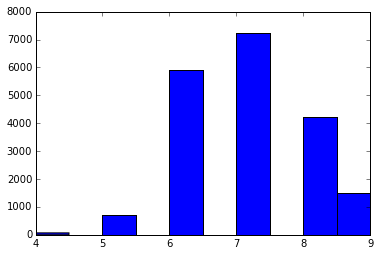

In [13]:
# dat with IP => to test for reliability on q10 (student self-assessed involvment in the course)

wrkld=dat[dat['three_evals']==1]['sum_q10']
plt.hist (wrkld)   

# Other analyses, not in paper

### Ratings and performance, pooled genders and stratified

In [14]:
# test association between ratings and performance, pooled genders.
# Since this uses the final exams, eliminate the IP courses

# group the data by instructor, discipline, gender, student gender

grouped = datNoIp.groupby(['prof_id', 'course', 'gender', 'student_gender'])
prof_ratings = grouped[evals].mean()

pass_fail = lambda x: np.mean([xx >= 10 for xx in x])
pass_rate = grouped['note_finale'].agg([np.mean,pass_fail])

teacher_data = pd.concat([prof_ratings, pass_rate], axis=1)
teacher_data = teacher_data.rename(columns = {'mean':'mean_final_exam', '<lambda>':'pass_rate'}).reset_index()

# Test association between ratings performance, pooled genders.
(t, plower, pupper, pboth, sims) = corr(x = teacher_data.q16, y = teacher_data.mean_final_exam, seed = rs)
print 'Ratings v. performance, pooled gender:',t, plower, pupper, pboth

# Test association between ratings performance, stratified by gender.
(t, plower, pupper, pboth, sims) = stratified.sim_corr(x = teacher_data.q16, y = teacher_data.mean_final_exam,
                                            group = teacher_data.gender, seed = rs)
print 'Ratings v. performance, stratified by gender:', t, plower, pupper, pboth

Ratings v. performance, pooled gender: 0.0528246155307 0.9193 0.0807 0.1592
Ratings v. performance, stratified by gender: 0.0844164315315 0.8629 0.1371 0.2698


### Ratings v instructor gender

In [15]:
grouped = dat.groupby(['prof_id'])
theCols = evals + ['prof_male']  # evaluation columns, plus indicator for male prof

prof_ratings = grouped[theCols].agg(np.mean)

(t, plower, pupper, pboth, sims) = corr(x = prof_ratings.q16, y = prof_ratings.prof_male, seed = rs)

print 'mean rating for instructors vs. instructor gender (positive favors males):', t, plower, pupper, pboth

mean rating for instructors vs. instructor gender (positive favors males): 0.105247396725 0.9794 0.0206 0.0419


### Instructor gender and student performance, student level

In [16]:
# remove students who took triads from instructors all of the same gender or who have missing final grades.
# Since this uses final exams, remove IP courses

datNonzeroVar = datNoIp.copy()
for g in np.unique(dat['student_id']):
    gg = dat['student_id'] == g
    if (np.var(datNoIp['note_cm'][gg]) == 0.0) or (np.var(datNoIp['prof_male'][gg]) == 0.0) or \
        np.any(np.isnan(datNoIp['note_cm'][gg])):
        datNonzeroVar = datNonzeroVar.drop(datNonzeroVar[datNonzeroVar['student_id'] == g].index)

(t, plower, pupper, pboth, sims) = stratified.sim_corr(x = datNonzeroVar[~np.isnan(datNonzeroVar['note_cm'])]['prof_male'],\
                                    y = datNonzeroVar[~np.isnan(datNonzeroVar['note_cm'])]['note_cm'],\
                                    group = datNonzeroVar[~np.isnan(datNonzeroVar['note_cm'])]['student_id'],\
                                    seed = rs, reps=10**3)
                                           
print 'Student-level association between instructor gender and performance:', t, plower, pupper, pboth

Student-level association between instructor gender and performance: -62.2604443985 0.025 0.975 0.048


### Association between instructors' average ratings and average continuous assessment grades, by teacher id

In [17]:
# Correlation of avg evaluation score and avg cont assessment grades, by instructor. 
# Includes IP courses

print 'Analyzing the correlation btw avg evaluation score and cont assessment, by instructor' 

theCols = evals + ['prof_male','plumTime','note_conf']

grouped = dat.groupby(['prof_id'])
prof_ratings = grouped[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['note_conf'], seed = rs)
print 'overall', t, pupper,\
       prof_ratings['note_conf'].size, '\n'

for topic in np.unique(dat.course):
    perTopic = dat[dat['course']==topic]
    grouped = perTopic.groupby(['prof_id'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['note_conf'], seed = rs)
    print topic, t, pupper, prof_ratings['note_conf'].size
    
    

Analyzing the correlation btw avg evaluation score and cont assessment, by instructor
overall 0.0339705120032 0.2633 372 

history 0.230161612418 0.0264 70
ip -0.0260723288441 0.5875 64
macro 0.232746688753 0.0138 92
micro 0.128885465346 0.1028 94
scpo 0.120833856289 0.2101 48
socio 0.194304589162 0.073 56


### Association between concordance of student and teacher genders and overall satisfaction

In [18]:
# Correlation of concordance of student and teacher genders and overall satisfaction. Includes IP courses.
print 'Correlation of concordance of student and teacher genders and overall satisfaction'
# Male instructors first

dMale = dat[dat['prof_male']==1]
dFemale = dat[dat['prof_female']==1]

(t, plow, pupper, pboth, sims) = corr(x=dMale['q16'], y=dMale['stu_male'], reps=10**5, seed=rs)
print 'Male instructors:', t, pupper

# Female instructors

(t, plow, pupper, pboth, sims) = corr(x=dFemale['q16'], y=dFemale['stu_female'], reps=10**5, seed=rs)
print 'Female instructors:', t, pupper

Correlation of concordance of student and teacher genders and overall satisfaction
Male instructors: 0.0831445895209 0.0
Female instructors: -0.00233685533328 0.57202


### Dimensions of teaching analyses

In [19]:
# Correlation of avg teaching dimension scores and final exam grade, by course number.
# Excludes IP.
print 'Analyzing the correlation btw teaching dimension scores and final exam grade, by course number' 

theCols = evals + ['prof_male','plumTime','note_cm']

grouped = datNoIp.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q5'], y = prof_ratings['note_cm'], seed = rs)
print 'overall', t, pupper,\
       prof_ratings['note_cm'].size, '\n'

for topic in np.unique(datNoIp.course):
    perTopic = datNoIp[datNoIp['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q5'], y = prof_ratings['note_cm'], seed = rs)
    print topic, t, pupper, prof_ratings['note_cm'].size
    
    

Analyzing the correlation btw teaching dimension scores and final exam grade, by course number
overall -0.052207480733 0.9473 950 

history -0.035271381641 0.6989 224
macro 0.0812193550034 0.1149 229
micro 0.0786543480669 0.1169 226
scpo 0.0550156342365 0.267 135
socio 0.0821015630437 0.1752 136


In [20]:
# Correlation of avg teaching dimension scores and final exam grade, by course number.
# Since this uses final, omit IP courses

print 'Analyzing the correlation btw teaching dimension scores and final exam grade, by course number' 

theCols = evals + ['prof_male','plumTime','note_cm']

grouped = datNoIp.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q5'], y = prof_ratings['note_cm'], seed = rs)

print 'overall', t, pupper,\
       prof_ratings['note_cm'].size, '\n'

for topic in np.unique(datNoIp.course):
    perTopic = datNoIp[datNoIp['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q5'], y = prof_ratings['note_cm'], seed = rs)
    print topic, t, pupper, prof_ratings['note_cm'].size

Analyzing the correlation btw teaching dimension scores and final exam grade, by course number
overall -0.052207480733 0.9456 950 

history -0.035271381641 0.6908 224
macro 0.0812193550034 0.1146 229
micro 0.0786543480669 0.1213 226
scpo 0.0550156342365 0.2717 135
socio 0.0821015630437 0.1793 136


### Gender concordance analyses

In [21]:
# Gender concordance v continuous assessment grade. Include IP. 
# This looks at how profs are rated by students.

dMale = dat[dat['prof_male']==1]
dMale = dMale[~np.isnan(dMale['note_conf'])]
              
dFemale = dat[dat['prof_female']==1]
dFemale = dFemale[~np.isnan(dFemale['note_conf'])]

(t, plow, pupper, pboth, sims) = corr(x=dMale['note_conf'], y=dMale['stu_male'], seed=rs)
print 'Concordance of genders v continuous assessment, male instructors:', t, pupper
                  
(t, plow, pupper, pboth, sims) = corr(x=dFemale['note_conf'], y=dFemale['stu_female'], seed=rs)
print 'Concordance of genders v continuous assessment, female instructors:', t, pupper

Concordance of genders v continuous assessment, male instructors: 0.0087200513394 0.1455
Concordance of genders v continuous assessment, female instructors: 0.0156940814384 0.0942


In [22]:
# Gender concordance v preparation & organization. Includes IP courses.
# This looks at how profs are rated by students.

# redundant, but safe:
dMale = dat[dat['prof_male']==1]
dMale = dMale[~np.isnan(dMale['q1'])]  # note! need to re-set in following analyses

dFemale = dat[dat['prof_female']==1]
dFemale = dFemale[~np.isnan(dFemale['q1'])]  # note! need to re-set in following analyses

# Male instructors
(t, plow, pupper, pboth, sims) = corr(x=dMale['q1'], y=dMale['stu_male'], seed=rs)
print 'Gender concordance v. preparation and organization, male instructors:', t, pupper

# Female instructors
(t, plow, pupper, pboth, sims) = corr(x=dFemale['q1'], y=dFemale['stu_female'], seed=rs)
print 'Gender concordance v. preparation and organization, female instructors:', t, pupper

Gender concordance v. preparation and organization, male instructors: 0.0450345213959 0.0
Gender concordance v. preparation and organization, female instructors: 0.0157071192709 0.0937


In [23]:
# Gender concordance v quality of instructional material. Includes IP courses.
# This looks at how profs are rated by students.

# redundant, but safe:
dMale = dat[dat['prof_male']==1]
dMale = dMale[~np.isnan(dMale['q2'])]  # note! need to re-set in following analyses

dFemale = dat[dat['prof_female']==1]
dFemale = dFemale[~np.isnan(dFemale['q2'])]  # note! need to re-set in following analyses

# Male instructors
(t, plow, pupper, pboth, sims) = corr(x=dMale['q2'], y=dMale['stu_male'], seed=rs)
print 'Gender concordance v. preparation and organization, male instructors:', t, pupper

# Female instructors
(t, plow, pupper, pboth, sims) = corr(x=dFemale['q2'], y=dFemale['stu_female'], seed=rs)
print 'Gender concordance v. preparation and organization, female instructors:', t, pupper

Gender concordance v. preparation and organization, male instructors: 0.0359435731205 0.0
Gender concordance v. preparation and organization, female instructors: 0.0136743115861 0.1226


In [24]:
# Gender concordance v quality of animation. Includes IP courses
# This looks at how profs are rated by students.

dMale = dat[dat['prof_male']==1]
dMale = dMale[~np.isnan(dMale['q5'])]
              
dFemale = dat[dat['prof_female']==1]
dFemale = dFemale[~np.isnan(dFemale['q5'])]

(t, plow, pupper, pboth, sims) = corr(x=dMale['q5'], y=dMale['stu_male'], seed=rs)
print 'Gender concordance v animation, male instructors:', t, pupper

(t, plow, pupper, pboth, sims) = corr(x=dFemale['q5'], y=dFemale['stu_female'], seed=rs)
print 'Gender concordance v animation, female instructors:', t, pupper

Gender concordance v animation, male instructors: 0.0500726660388 0.0
Gender concordance v animation, female instructors: 0.0203476177142 0.0428


### Differences in continuous assessment and final exam grades analyses

In [25]:
# Correlation btw avg evaluation score and difference btw continuous assessment and final grade, by course number
# Exclude IP courses
print 'Avg evaluation score v difference btw continuous assessment & final grade, by course number' 

theCols = evals + ['prof_male','plumTime','note_cm', 'diff_final_cont']

grouped = datNoIp.groupby(['course_number'])
prof_ratings = grouped[theCols].agg(np.mean)
(t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['diff_final_cont'], seed = rs)
print 'overall', t, pupper,\
       prof_ratings['diff_final_cont'].size, '\n'

for topic in np.unique(datNoIp.course):
    perTopic = datNoIp[datNoIp['course']==topic]
    grouped = perTopic.groupby(['course_number'])
    prof_ratings = grouped[theCols].agg(np.mean)
    (t, plow, pupper, pboth, sims) = corr(x = prof_ratings['q16'], y = prof_ratings['diff_final_cont'], seed = rs)
    print topic, t, pupper, prof_ratings['diff_final_cont'].size 

Avg evaluation score v difference btw continuous assessment & final grade, by course number
overall 0.098629691166 0.0009 950 

history 0.136630399402 0.0177 224
macro 0.0239854106221 0.3602 229
micro -0.0167164772184 0.5994 226
scpo 0.111944247681 0.098 135
socio 0.121772764345 0.0779 136


In [26]:
# Gender concordance v and difference btw continuous assessment and final grade. Includes IP courses
# This looks at how profs grade students compared to their actual level.

dMale = dat[dat['prof_male']==1]
dMale = dMale[~np.isnan(dMale['diff_final_cont'])]
              
dFemale = dat[dat['prof_female']==1]
dFemale = dFemale[~np.isnan(dFemale['diff_final_cont'])]

(t, plow, pupper, pboth, sims) = corr(x=dMale['diff_final_cont'], y=dMale['stu_male'], seed=rs)
print 'Gender concordance v difference btw continuous assessment and final grade, male instructors:', t, pupper

(t, plow, pupper, pboth, sims) = corr(x=dFemale['diff_final_cont'], y=dFemale['stu_female'], seed=rs)
print 'Gender concordance v difference btw continuous assessment and final grade, female instructors:', t, pupper

Gender concordance v difference btw continuous assessment and final grade, male instructors: -0.0165534167593 0.9812
Gender concordance v difference btw continuous assessment and final grade, female instructors: 0.0265258442011 0.0119
